# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_wheader.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_wheader.csv"
paths.gen_1_path <- "../data/results/gen_prof_100000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,X1772072276_E05,X914mat_H11,X1772071068_B07,GHA501A161,X1772072285_A02,X1772067078_D01,X1772071037_A07,P1.4.C12,X915mat_A11,X1772067095_E06,⋯,X1772067090_F12,X1772071032_B07,X915mat_F2,P1.5.D10,X819b_A11,X1772071034_E01,X1772067095_C06,AG2pos_70,P1.3.H10,X1772067056_F11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,2.185867,0.000000,6.244983,0.000000,0.000000,0.000000,5.312883,0.000000,0,⋯,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,4.8968410,0.000000,0.000000
Cd47,0.000000,2.201634,2.211667,9.395482,3.794915,0.000000,2.703221,4.848498,3.033863,0,⋯,0.000000,0.000000,0.5058909,5.773733,3.657640,3.906619,3.543340,5.7978315,3.742006,0.000000
Elmo2,0.000000,6.457463,0.000000,1.563180,0.000000,0.000000,0.000000,4.789208,0.000000,0,⋯,0.000000,0.000000,5.3136087,5.969703,5.882399,0.000000,0.000000,0.0000000,4.473787,0.000000
Crip2,5.603894,5.970854,0.000000,0.000000,5.656519,6.397983,7.220371,4.238787,8.365010,0,⋯,7.001264,6.507275,6.4974527,2.140779,8.622308,6.761019,6.112525,5.6597434,5.048759,6.928016
Pprc1,0.000000,6.683135,0.000000,1.976308,0.000000,0.000000,0.000000,5.522935,4.855990,0,⋯,0.000000,0.000000,4.6229304,4.878235,5.195348,0.000000,0.000000,0.0000000,4.032101,0.000000
Ccdc174,5.192658,2.035624,0.000000,2.441693,0.000000,0.000000,3.153980,2.963474,0.000000,0,⋯,0.000000,0.000000,1.2326608,3.927896,5.461070,0.000000,0.000000,0.3565304,1.432959,0.000000


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,X1772067078_F01,X1772072256_A04,X915mat_D7,X1772071061_C06,X1772067071_E12,X1772072275_C04,X1772071025_G10,GHA501A99,P1.4.B4,X1772071026_A07,⋯,GHA501A70,P2.1.E11,P1.6.G9,X1772071066_C01,X1772067071_C11,P1.4.D3,X1772067085_C01,X1772067084_E05,X1772067086_A07,X1772071066_E04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.3412742,3.184861,0.000000,0.000000,0,3.921598,0.000000,0.000000,⋯,1.7801001,2.733354,0.000000,0,0.000000,5.057450,0.000000,0.00000,0.000000,0
Cd47,0.000000,4.431887,0.0000000,1.863625,3.542647,0.000000,0,8.581246,5.945093,3.837048,⋯,9.2950091,6.300673,4.323370,0,0.000000,5.549361,3.452111,0.00000,2.307694,0
Elmo2,0.000000,0.000000,0.9259994,0.000000,0.000000,0.000000,0,6.343773,0.000000,3.481645,⋯,0.5416181,5.930737,5.809157,0,3.165435,4.999549,1.537250,0.00000,0.000000,0
Crip2,5.867711,4.772839,7.9027972,6.168253,0.000000,5.438343,0,0.000000,9.175450,6.687053,⋯,0.0000000,3.646163,4.496335,0,6.339514,3.097611,6.441090,6.66738,6.842295,0
Pprc1,0.000000,0.000000,2.6735564,0.000000,0.000000,0.000000,0,2.725903,0.000000,0.000000,⋯,0.2765536,3.224966,4.494416,0,0.000000,3.739848,0.000000,0.00000,0.000000,0
Ccdc174,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0,1.939234,0.000000,4.325534,⋯,5.3613503,3.181103,1.594549,0,0.000000,3.925999,0.000000,0.00000,0.000000,0


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

min(genprof_1_raw, na.rm=TRUE)
max(genprof_1_raw, na.rm=TRUE)

,gencell_ep100000_0,gencell_ep100000_1,gencell_ep100000_2,gencell_ep100000_3,gencell_ep100000_4,gencell_ep100000_5,gencell_ep100000_6,gencell_ep100000_7,gencell_ep100000_8,gencell_ep100000_9,⋯,gencell_ep100000_490,gencell_ep100000_491,gencell_ep100000_492,gencell_ep100000_493,gencell_ep100000_494,gencell_ep100000_495,gencell_ep100000_496,gencell_ep100000_497,gencell_ep100000_498,gencell_ep100000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.1810150,-0.02457161,0.3077602,-0.34605104,2.70325850,0.51301956,4.9670944,2.2013159,0.2136764,-0.3741803,⋯,-1.09654430,7.2143097,-0.1259062,4.3362160,-0.04176006,-0.06481762,0.3668327,-0.7153748,-0.2237480,0.3009834
Cd47,2.3215313,-0.75954780,2.7474556,2.25006100,2.37285230,0.50534060,-0.8738892,1.7201629,-1.2545700,3.5908325,⋯,-0.03018265,-0.7414490,2.1631030,0.3204269,2.55700300,1.94782260,2.7329311,4.0932310,-1.2524449,2.6811867
Elmo2,4.1134186,-0.22462578,4.4214210,-0.10761109,1.69342230,-0.08892289,-0.5129105,1.0058527,-0.6066673,2.5236483,⋯,-0.55274737,1.8665924,3.3934937,11.1495820,5.04884530,5.56456200,4.3950940,-0.4542915,-0.2896763,4.4621067
Crip2,2.5422497,8.26985550,1.2171841,5.39052600,-0.01406078,6.66849500,13.7853240,0.6029806,4.9803085,4.6598340,⋯,15.76499200,5.9205704,4.7435265,10.9830910,1.59799960,2.13781550,1.1600952,7.1539764,7.1823580,1.3075085
Pprc1,1.9950619,1.34796140,1.9996109,-0.03809509,-0.27097493,0.32758330,3.2451400,-0.2717299,-0.7183434,0.7364531,⋯,6.40703600,0.5828629,2.9390965,-0.5431755,1.13751790,0.23190498,1.9793625,0.3319855,2.7311668,1.7206745
Ccdc174,0.5561276,1.94201280,0.8271675,1.23392490,1.95881460,1.88653560,7.4141235,0.9749746,-0.5823258,1.2366343,⋯,2.02026370,3.6949997,1.5903683,-1.0665619,0.48382950,-0.06810093,0.7966213,0.6427383,-1.2894837,0.6752720


[1] -8.241879

[1] 40.11889

Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 1712 features requested have zero variance (running reduction without them): Krt79, Calm4, Ly6g6c, Dapl1, Sprr1a, Capns2, Orm1, Gas6, Krt10, Krt5, Zfp750, Klk7, Mt4, Crct1, Krtdap, Gm94, Lgals1, Cldn4, Gm4832, S100a4, Aqp3, Ivl, Spink5, Postn, Ifitm3, Cdsn, Ly6a, Krt6a, Tacstd2, Krt16, Gatad1, Krt14, Tgm5, Crabp2, Tmprss4, Krt75, Cst6, Mt2, Tubb6, Nupr1, Vim, AA986860, Fstl1, Ccdc3, Acer1, Ephx3, Atf3, Asprv1, Ier3, Defb1, Gjb2, Car13, Fam162a, Psapl1, Rpl34, Ly6g6e, Fosb, Btg2, D8Ertd738e, Cd34, Sparc, Nfkbia, Pof1b, Yeats4, Bnip3, Serpinb2, Pfdn1, Fzd2, Rps29, Cct2, Rpl30, Bpifc, Pin4, Dynlt1a, Soat1, Tgfbi, Lypd3, Hspe1, Polr2l, Grhl3, Kitl, Aldh3b2, Sostdc1, Twf1, Gpx8, Bgn, Sdr16c5, Alox12e, Clca1, Calml3, 2310011J03Rik, Chl1, Mien1, Ovol1, Lgalsl, Rhov, Dctpp1, Mdm2, Cks2, Ifitm2, Smpdl3a, Gjb5, Golt1b, Pgk1, Dhrs7, Bcam, Vmp1, Mill1, Cdk6, Rgcc, Tmem154, Hbegf, Moxd1, Sarnp, Htatip

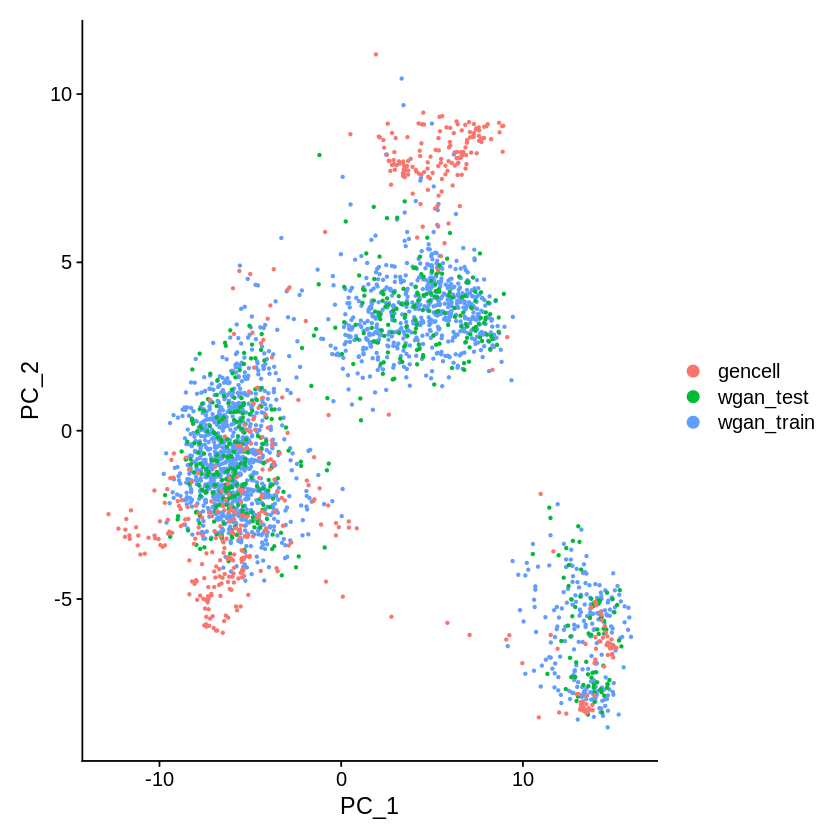

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 1:10)

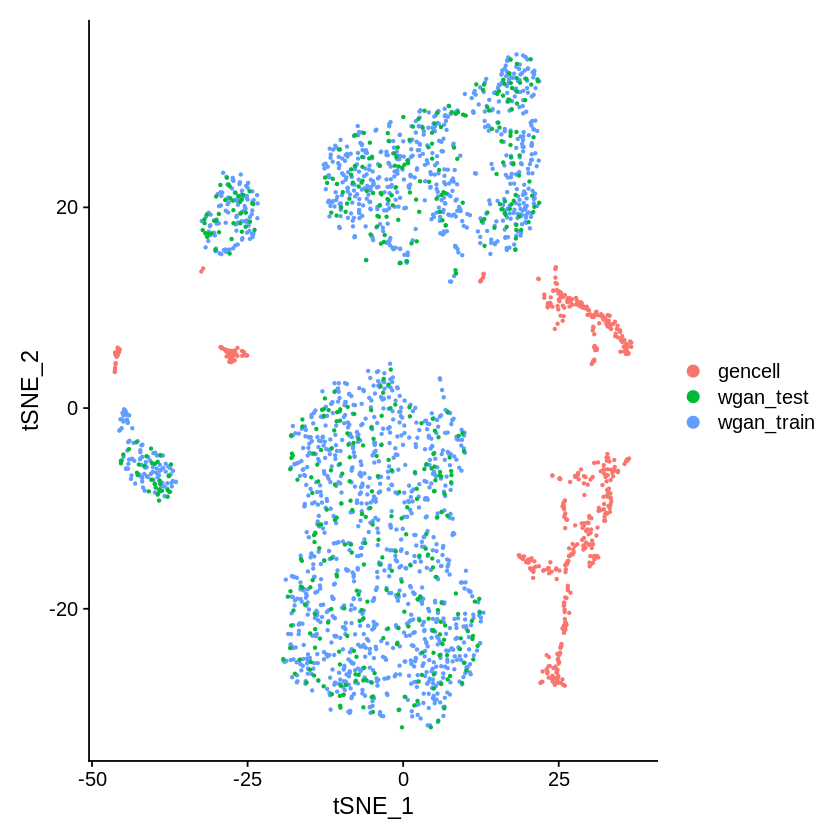

In [19]:
DimPlot(data_combined, reduction = "tsne")